In [1]:
import pandas as pd

telemetry = pd.read_csv('PdM_telemetry.csv')
#errors = pd.read_csv('PdM_errors.csv')
#maint = pd.read_csv('PdM_maint.csv')
failures = pd.read_csv('PdM_failures.csv')
machines = pd.read_csv('PdM_machines.csv')

In [2]:
telemetry

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
876096,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
876097,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561
876098,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259


In [3]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(telemetry.index))
print(telemetry.head())
telemetry.describe()


Total number of telemetry records: 876100
             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  


,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Date')

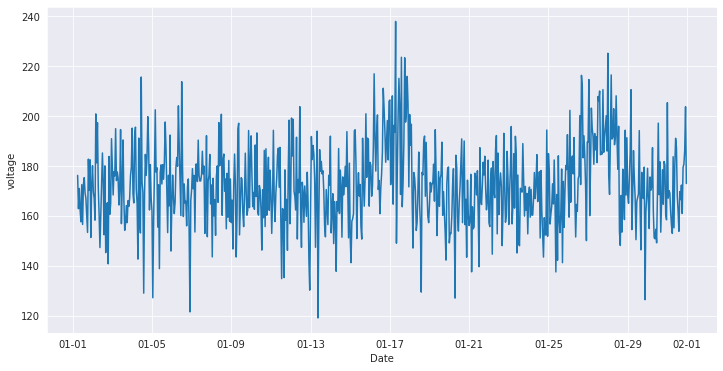

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'volt']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

In [5]:
# errors['datetime'] = pd.to_datetime(errors['datetime'], format="%Y-%m-%d %H:%M:%S")
# errors['errorID'] = errors['errorID'].astype('category')

# print("Total number of error records: %d" % len(errors.index))
# errors.head()

NameError: name 'errors' is not defined

In [6]:
machines['model'] = machines['model'].astype('category')

In [7]:
# format datetime field which comes in as string
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('category')

print("Total number of failures: %d" % len(failures.index))
failures.head()

Total number of failures: 761


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [20]:
# Calculate mean values for telemetry features
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right', how='mean').unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)

# repeat for standard deviation
temp = []
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right', how='std').unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_mean_3h.head()


/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  
/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).std()


,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [26]:
telemetry_feat = pd.concat([telemetry_mean_3h,
                            telemetry_sd_3h.ix[:, 2:6],
                            ], axis=1).dropna()
telemetry_feat.describe()
telemetry_feat.describe()

/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h
count,292000.000000,292000.000000,292000.000000,292000.000000,292000.000000,292000.000000,292000.000000,292000.000000,292000.000000
mean,50.500000,170.777300,446.605807,100.858510,40.384920,13.299090,44.456338,8.885976,4.441164
std,28.866119,9.500846,33.130042,7.414517,3.478823,6.965914,23.216712,4.656211,2.320302
min,1.000000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278
25%,25.750000,164.449510,427.560977,96.238546,38.147765,8.027455,26.903705,5.370581,2.684790
50%,50.500000,170.434378,448.382261,100.234191,40.145837,12.495658,41.794719,8.346020,4.173955
75%,75.250000,176.611778,468.448505,104.406557,42.227559,17.688490,59.104130,11.790303,5.900106
max,100.000000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595


In [27]:
telemetry_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502,6.721032,67.849599,18.934956,5.874970
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891,7.596570,50.120452,8.555032,7.662229
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405,10.124584,55.084734,5.909721,5.169304
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739,4.673269,42.047278,4.554047,2.106108
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542,14.752132,47.048609,4.244158,2.207884


In [28]:
df=telemetry_feat

In [29]:


from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



In [30]:
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [32]:
plot_df = df.loc[ df['machineID']==1 & (df['datetime'] > pd.to_datetime('2015-01-01')) 
                   & (df['datetime'] < pd.to_datetime('2015-02-01')),
                  ['datetime','volt']]

/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [33]:
plot_df.shape

(245, 2)

In [34]:
machines

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2
...,...,...,...
95,96,model2,10
96,97,model2,14
97,98,model2,20
98,99,model1,14


In [35]:
final = df.merge(machines,how='inner',left_on=['machineID'], right_on=['machineID'])

In [36]:
final

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,model,age
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502,6.721032,67.849599,18.934956,5.874970,model3,18
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891,7.596570,50.120452,8.555032,7.662229,model3,18
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405,10.124584,55.084734,5.909721,5.169304,model3,18
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739,4.673269,42.047278,4.554047,2.106108,model3,18
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542,14.752132,47.048609,4.244158,2.207884,model3,18
...,...,...,...,...,...,...,...,...,...,...,...,...
291995,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,model4,5
291996,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,model4,5
291997,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,model4,5
291998,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,model4,5


In [37]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [38]:
failures['failure'] =1

In [39]:
final['datetime'] = pd.to_datetime( final['datetime'] )

In [40]:
failures

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,1
1,2015-03-06 06:00:00,1,1
2,2015-04-20 06:00:00,1,1
3,2015-06-19 06:00:00,1,1
4,2015-09-02 06:00:00,1,1
...,...,...,...
756,2015-11-29 06:00:00,99,1
757,2015-12-14 06:00:00,99,1
758,2015-02-12 06:00:00,100,1
759,2015-09-10 06:00:00,100,1


In [41]:
final2 = final.merge(failures, how='left',left_on=['machineID','datetime'],right_on=['machineID','datetime'])

In [42]:
final2

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,model,age,failure
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502,6.721032,67.849599,18.934956,5.874970,model3,18,NaN
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891,7.596570,50.120452,8.555032,7.662229,model3,18,NaN
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405,10.124584,55.084734,5.909721,5.169304,model3,18,NaN
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739,4.673269,42.047278,4.554047,2.106108,model3,18,NaN
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542,14.752132,47.048609,4.244158,2.207884,model3,18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292037,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,model4,5,NaN
292038,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,model4,5,NaN
292039,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,model4,5,NaN
292040,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,model4,5,NaN


In [44]:
final2.head(20)

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,model,age,failure
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502,6.721032,67.849599,18.934956,5.874970,model3,18,NaN
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891,7.596570,50.120452,8.555032,7.662229,model3,18,NaN
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405,10.124584,55.084734,5.909721,5.169304,model3,18,NaN
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739,4.673269,42.047278,4.554047,2.106108,model3,18,NaN
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542,14.752132,47.048609,4.244158,2.207884,model3,18,NaN
5,1,2015-01-02 00:00:00,168.779396,486.242664,90.446472,41.796657,15.901952,36.129552,4.310741,9.390494,model3,18,NaN
6,1,2015-01-02 03:00:00,172.277489,477.738628,89.104865,41.232001,6.884615,46.850076,9.205122,3.019906,model3,18,NaN
7,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,model3,18,NaN
8,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,model3,18,NaN
9,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,model3,18,NaN


In [45]:
final2['model'] = final2['model'].astype('category')

In [46]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_enc = OrdinalEncoder()
final2_model = ordinal_enc.fit_transform( final2[['model']] )

In [47]:


transformed = pd.DataFrame(final2_model)



In [48]:
final3 = pd.concat([final2, transformed], axis=1).drop(['model'],axis=1)

In [49]:
final3['model_enc'].value_counts()

KeyError: 'model_enc'

In [50]:
final3

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,age,failure,0
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502,6.721032,67.849599,18.934956,5.874970,18,NaN,2.0
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891,7.596570,50.120452,8.555032,7.662229,18,NaN,2.0
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405,10.124584,55.084734,5.909721,5.169304,18,NaN,2.0
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739,4.673269,42.047278,4.554047,2.106108,18,NaN,2.0
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542,14.752132,47.048609,4.244158,2.207884,18,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292037,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,5,NaN,3.0
292038,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,5,NaN,3.0
292039,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,5,NaN,3.0
292040,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,5,NaN,3.0


In [51]:
final3.rename( columns={0:'model_enc'} , inplace=True)

In [52]:
final3

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,age,failure,model_enc
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502,6.721032,67.849599,18.934956,5.874970,18,NaN,2.0
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891,7.596570,50.120452,8.555032,7.662229,18,NaN,2.0
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405,10.124584,55.084734,5.909721,5.169304,18,NaN,2.0
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739,4.673269,42.047278,4.554047,2.106108,18,NaN,2.0
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542,14.752132,47.048609,4.244158,2.207884,18,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292037,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,5,NaN,3.0
292038,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,5,NaN,3.0
292039,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,5,NaN,3.0
292040,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,5,NaN,3.0


In [53]:
final3.sort_values(by=['datetime'], inplace=True)

In [54]:
final3.to_csv('final_try_join_on_datetime_not_date.csv',index=False)

In [55]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [56]:
final3.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,age,failure,model_enc
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502,6.721032,67.849599,18.934956,5.874970,18,NaN,2.0
70096,25,2015-01-01 09:00:00,171.263532,443.124765,85.704358,47.941445,22.887793,12.723050,5.513459,2.368597,16,NaN,3.0
277439,96,2015-01-01 09:00:00,159.717088,438.906617,113.258166,39.053269,15.185072,7.271685,6.713896,5.832331,10,NaN,1.0
73018,26,2015-01-01 09:00:00,158.005146,433.225223,92.453410,38.452354,5.610847,43.714665,15.676686,3.623956,3,NaN,2.0
75938,27,2015-01-01 09:00:00,174.845040,464.924524,102.192941,39.612447,21.835042,29.039319,1.460337,1.097257,9,NaN,2.0


In [57]:
final3.loc[final3['failure']!=1, 'failure']=0

In [58]:
final3.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,age,failure,model_enc
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502,6.721032,67.849599,18.934956,5.874970,18,0.0,2.0
70096,25,2015-01-01 09:00:00,171.263532,443.124765,85.704358,47.941445,22.887793,12.723050,5.513459,2.368597,16,0.0,3.0
277439,96,2015-01-01 09:00:00,159.717088,438.906617,113.258166,39.053269,15.185072,7.271685,6.713896,5.832331,10,0.0,1.0
73018,26,2015-01-01 09:00:00,158.005146,433.225223,92.453410,38.452354,5.610847,43.714665,15.676686,3.623956,3,0.0,2.0
75938,27,2015-01-01 09:00:00,174.845040,464.924524,102.192941,39.612447,21.835042,29.039319,1.460337,1.097257,9,0.0,2.0


In [59]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [60]:
df_new = final3['failure']
df_new = pd.DataFrame(df_new,columns=['failure'])

final3.drop( labels=['failure'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(final3, df_new, test_size = 0.3, random_state=42,shuffle=False)

In [61]:
X_train.index = X_train['datetime']
X_train.drop(labels = ['datetime'], axis=1, inplace=True)
X_train.head(10)

/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,age,model_enc
datetime,,,,,,,,,,,
2015-01-01 09:00:00,1,170.028993,449.533798,94.592122,40.893502,6.721032,67.849599,18.934956,5.874970,18,2.0
2015-01-01 09:00:00,25,171.263532,443.124765,85.704358,47.941445,22.887793,12.723050,5.513459,2.368597,16,3.0
2015-01-01 09:00:00,96,159.717088,438.906617,113.258166,39.053269,15.185072,7.271685,6.713896,5.832331,10,1.0
2015-01-01 09:00:00,26,158.005146,433.225223,92.453410,38.452354,5.610847,43.714665,15.676686,3.623956,3,2.0
2015-01-01 09:00:00,27,174.845040,464.924524,102.192941,39.612447,21.835042,29.039319,1.460337,1.097257,9,2.0
2015-01-01 09:00:00,28,183.994246,469.951349,99.878674,38.605387,20.221549,21.216073,10.207095,6.454947,1,3.0
2015-01-01 09:00:00,29,173.634636,464.314017,92.644900,41.422948,24.287538,38.676633,10.998276,6.527024,3,3.0
2015-01-01 09:00:00,30,157.529902,451.233900,94.961695,37.053138,19.979835,36.431128,7.393381,3.391138,20,2.0
2015-01-01 09:00:00,95,183.925906,458.026262,124.682715,42.040644,15.976951,72.086287,1.976560,6.338259,18,1.0


In [62]:
scaler = StandardScaler()
X_train1 = X_train.copy()
X_train1 = scaler.fit_transform(X_train1)
indexes = X_train.index
columns = X_train.columns
X_train1 = pd.DataFrame(X_train1)
X_train1.index = indexes
X_train1.columns = columns
X_train1

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,age,model_enc
datetime,,,,,,,,,,,
2015-01-01 09:00:00,-1.714746,-0.081462,0.089030,-0.844526,0.142124,-0.942520,1.008373,2.162433,0.617659,1.144521,0.162046
2015-01-01 09:00:00,-0.883340,0.048437,-0.104588,-2.051194,2.164554,1.377583,-1.366610,-0.723780,-0.892237,0.801326,1.115011
2015-01-01 09:00:00,1.576238,-1.166485,-0.232019,1.689713,-0.385937,0.272161,-1.601468,-0.465633,0.599298,-0.228259,-0.790918
2015-01-01 09:00:00,-0.848698,-1.346617,-0.403654,-1.134893,-0.558372,-1.101843,-0.031418,1.461761,-0.351661,-1.429442,0.162046
2015-01-01 09:00:00,-0.814056,0.425285,0.553986,0.187417,-0.225479,1.226502,-0.663666,-1.595380,-1.439696,-0.399857,0.162046
...,...,...,...,...,...,...,...,...,...,...,...
2015-09-13 18:00:00,-0.225143,0.335802,-1.035721,-0.412085,0.642154,-1.201798,-1.313346,-1.298144,-0.047434,-0.743052,1.115011
2015-09-13 18:00:00,-0.571562,-0.063629,0.008784,0.018387,0.225530,0.618225,2.049948,-0.066012,-0.317499,-0.228259,1.115011
2015-09-13 18:00:00,-0.987266,-0.560877,1.393827,0.284073,-0.107629,-0.611853,-0.370519,-1.047389,-1.217934,0.458131,-1.743883


In [63]:
X_test.index = X_test['datetime']
X_test.drop(labels = ['datetime'],axis=1, inplace=True)
X_test.head(10)


/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,age,model_enc
datetime,,,,,,,,,,,
2015-09-13 18:00:00,21,187.436065,412.334398,107.184033,36.983602,6.695337,31.358625,3.455572,4.636834,14,1.0
2015-09-13 18:00:00,35,160.860010,465.777272,103.152121,42.540521,13.897162,13.251720,9.322863,2.593498,17,0.0
2015-09-13 21:00:00,88,173.461480,401.494351,95.007141,38.263642,6.933988,48.755561,3.576603,1.500524,14,3.0
2015-09-13 21:00:00,14,169.180069,457.336843,101.863023,43.154637,33.166647,50.040400,3.511025,1.943426,1,2.0
2015-09-13 21:00:00,56,182.554941,505.590631,95.449689,36.919174,18.047165,44.495882,4.206101,2.840821,10,0.0
2015-09-13 21:00:00,18,175.950118,469.245464,94.497699,40.579120,9.268512,101.299352,3.794108,6.862339,15,2.0
2015-09-13 21:00:00,19,176.544924,488.819862,99.966543,43.545895,10.394539,25.160981,8.718246,4.021756,17,2.0
2015-09-13 21:00:00,95,172.253639,438.265792,83.753443,40.563975,24.547269,23.133127,6.604478,3.985846,18,1.0
2015-09-13 21:00:00,15,168.426409,385.088870,95.086297,41.931044,14.878548,34.256042,7.044568,3.807612,14,2.0


In [74]:
X_test1 = X_test.copy()
X_test1 = scaler.fit_transform(X_test1)
X_test1 = pd.DataFrame(X_test1)
indexes = X_test.index
X_test1.index = indexes
X_test1.columns = columns
X_test1.head(10)

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,age,model_enc
datetime,,,,,,,,,,,
2015-09-13 18:00:00,-1.021935,1.759488,-1.032112,0.824352,-0.972601,-0.952175,-0.565091,-1.166010,0.083805,0.458095,-0.790837
2015-09-13 18:00:00,-0.536934,-1.038194,0.576447,0.289391,0.629927,0.082259,-1.344612,0.090348,-0.798452,0.972905,-1.743767
2015-09-13 21:00:00,1.299141,0.288373,-1.358383,-0.791299,-0.603458,-0.917896,0.183865,-1.140094,-1.270369,0.458095,1.115024
2015-09-13 21:00:00,-1.264436,-0.162335,0.322402,0.118351,0.807028,2.850030,0.239178,-1.154136,-1.079136,-1.772747,0.162094
2015-09-13 21:00:00,0.190567,1.245649,1.774776,-0.732581,-0.991181,0.678344,0.000481,-1.005300,-0.691665,-0.228318,-1.743767
2015-09-13 21:00:00,-1.125864,0.550354,0.680835,-0.858893,0.064289,-0.582577,2.445929,-1.093520,1.044717,0.629698,0.162094
2015-09-13 21:00:00,-1.091221,0.612969,1.269999,-0.133277,0.919860,-0.420840,-0.831906,-0.039118,-0.181769,0.972905,0.162094
2015-09-13 21:00:00,1.541641,0.161222,-0.251612,-2.284460,0.059922,1.611986,-0.919207,-0.491737,-0.197274,1.144508,-0.790837
2015-09-13 21:00:00,-1.229793,-0.241673,-1.852166,-0.780797,0.454163,0.223220,-0.440355,-0.397501,-0.274231,0.458095,0.162094


In [75]:
from tensorflow import keras
X_train.shape[1:]

(11,)

In [76]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='softmax')
])

In [77]:


model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',metrics=['accuracy'])



In [78]:
history = model.fit( X_train1, y_train, epochs=8 )

Train on 204429 samples
Epoch 1/8
204429/204429 [==============================] - 26s 127us/sample - loss: 0.0280 - accuracy: 0.9968
Epoch 2/8
204429/204429 [==============================] - 26s 126us/sample - loss: 0.0190 - accuracy: 0.9973
Epoch 3/8
204429/204429 [==============================] - 24s 119us/sample - loss: 0.0181 - accuracy: 0.9973
Epoch 4/8
204429/204429 [==============================] - 25s 120us/sample - loss: 0.0176 - accuracy: 0.9973
Epoch 5/8
204429/204429 [==============================] - 24s 119us/sample - loss: 0.0172 - accuracy: 0.9973
Epoch 6/8
204429/204429 [==============================] - 25s 120us/sample - loss: 0.0170 - accuracy: 0.9973
Epoch 7/8
204429/204429 [==============================] - 25s 120us/sample - loss: 0.0168 - accuracy: 0.9973
Epoch 8/8
204429/204429 [==============================] - 24s 119us/sample - loss: 0.0166 - accuracy: 0.9973


In [79]:
model.evaluate(X_test1,y_test)

87613/87613 [==============================] - 6s 67us/sample - loss: 0.0146 - accuracy: 0.9976


[0.014630242208855455, 0.9976488]